In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster as ct
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AffinityPropagation, DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [ ]:
df = pd.read_csv('/content/Dados-Grupo4.csv')
df

,Unnamed: 0,Coluna1,Coluna2
0,0,-6.542464,-1.818939
1,1,-6.875953,-2.532712
2,2,-8.062709,-2.726938
3,3,4.386537,-5.595920
4,4,-2.098240,4.105195
...,...,...,...
2117,1991,7.674146,-5.152017
2118,1992,1.586933,-7.326131
2119,1993,3.941350,-3.540000
2120,1994,-8.739916,0.141528


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.describe()

,Coluna1,Coluna2
count,2120.000000,2114.000000
mean,-2.285782,0.381135
std,6.151070,5.669866
min,-12.790798,-11.181979
25%,-7.292074,-4.569370
50%,-3.853543,1.262565
75%,2.200668,5.048416
max,11.660251,11.518465


In [ ]:
df.isna().any()

,0
Coluna1,True
Coluna2,True


In [ ]:
df.fillna(df.mean(), inplace=True)
df.isna().any()

,0
Coluna1,False
Coluna2,False


In [ ]:
df.duplicated().any()

np.True_

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

np.False_

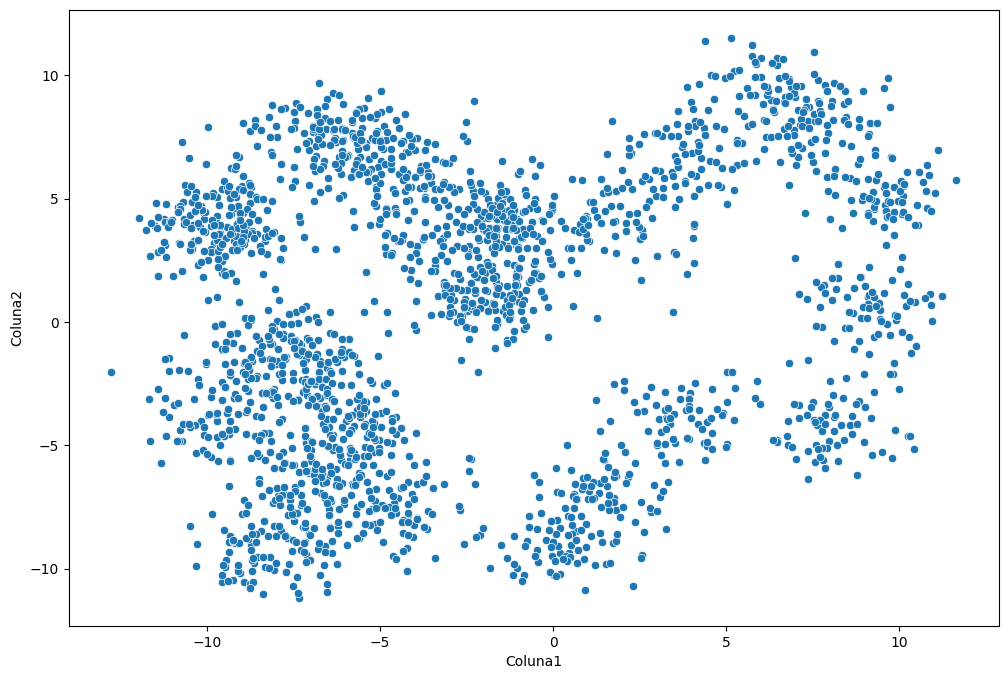

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df, x='Coluna1', y='Coluna2')
plt.show()

# KMeans

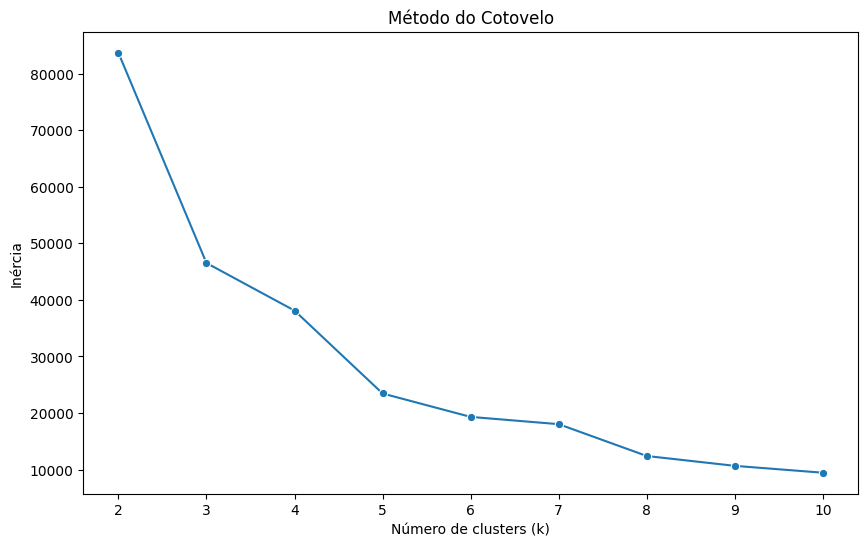

In [ ]:
labels = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels.append(kmeans.fit(df).inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=labels, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.show()

In [ ]:
score = []
for k in range(3, 7):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(df)
  labels = kmeans.labels_
  score.append(mt.silhouette_score(df, labels))
  print(f'Silhouette Score para k={k}: {score[-1]}')

Silhouette Score para k=3: 0.45247434096829087
Silhouette Score para k=4: 0.4150626932361526
Silhouette Score para k=5: 0.4876876988407566
Silhouette Score para k=6: 0.45302635138380953


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(df)
labels1 = kmeans.labels_
centers1 = kmeans.cluster_centers_

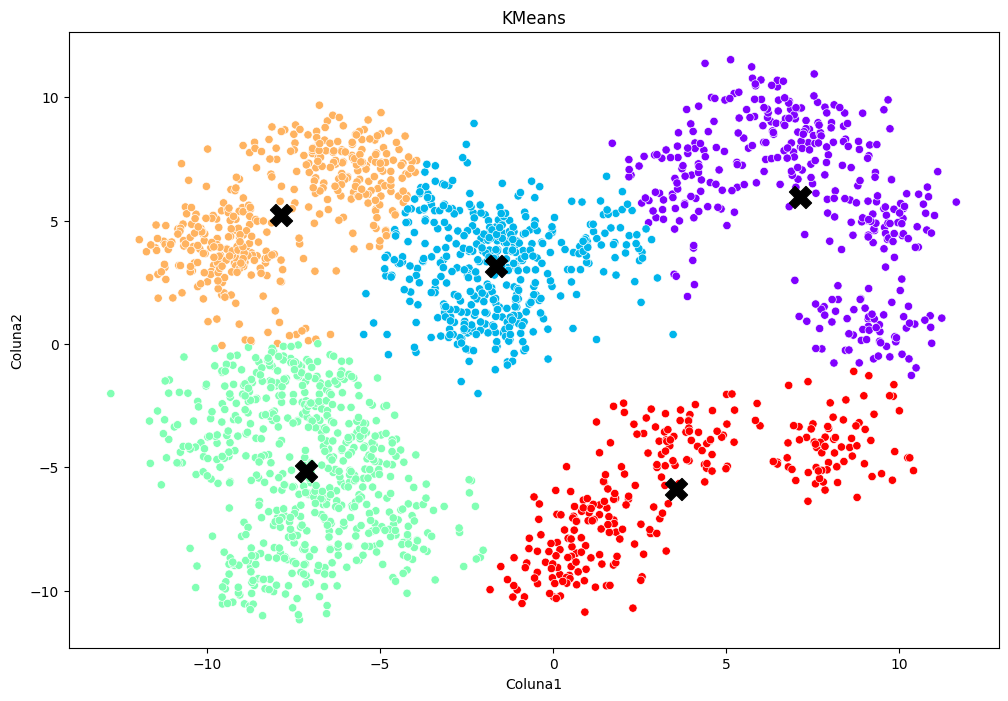

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df, x='Coluna1', y='Coluna2', c=labels1, cmap='rainbow')
plt.scatter(centers1[:, 0], centers1[:, 1], s=250, c='black', marker='X')
plt.title('KMeans')
plt.show()

# MeanShift

In [ ]:
tam_banda = estimate_bandwidth(df, quantile=0.2, n_samples=500)
float(tam_banda)

5.929483729481514

In [ ]:
model = MeanShift(bandwidth=tam_banda, bin_seeding=True)
model.fit(df)
labels2 = model.labels_
centers2 = model.cluster_centers_

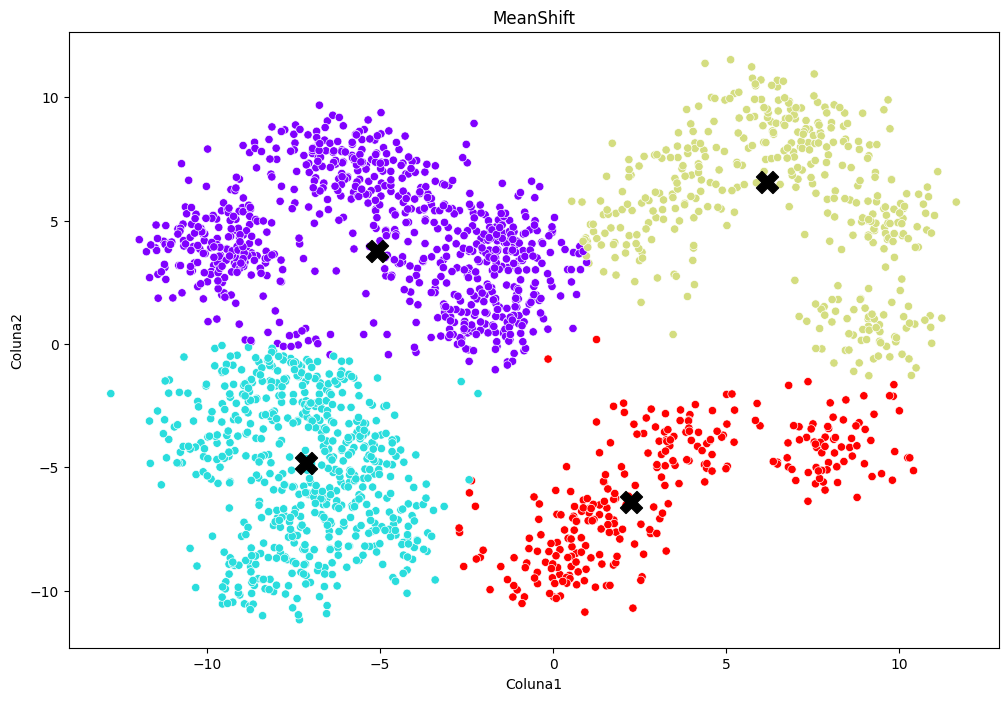

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df, x='Coluna1', y='Coluna2', c=labels2, cmap='rainbow')
plt.scatter(centers2[:, 0], centers2[:, 1], s=250, c='black', marker='X')
plt.title('MeanShift')
plt.show()

# DBSCAN

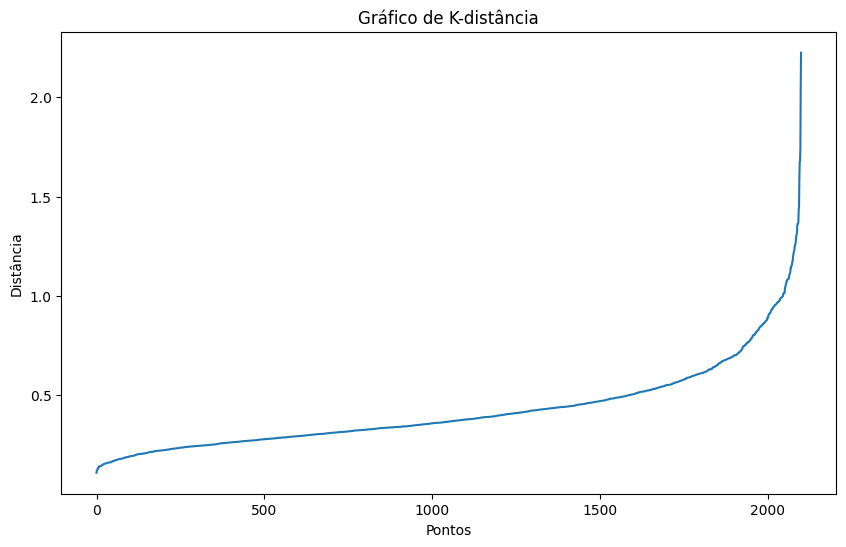

In [ ]:
def plot_k_distance_graph(X1, k):
  neigh = NearestNeighbors(n_neighbors=k)
  neigh.fit(X1)
  distances, _ = neigh.kneighbors(X1)
  distances = np.sort(distances[:, -1])
  plt.figure(figsize=(10, 6))
  plt.plot(distances)
  plt.title('Gráfico de K-distância')
  plt.xlabel('Pontos')
  plt.ylabel('Distância')
  plt.show()
plot_k_distance_graph(df, k=5)

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan = dbscan.fit(df)
labels4 = dbscan.labels_
# centers4 = dbscan.cluster_centers_

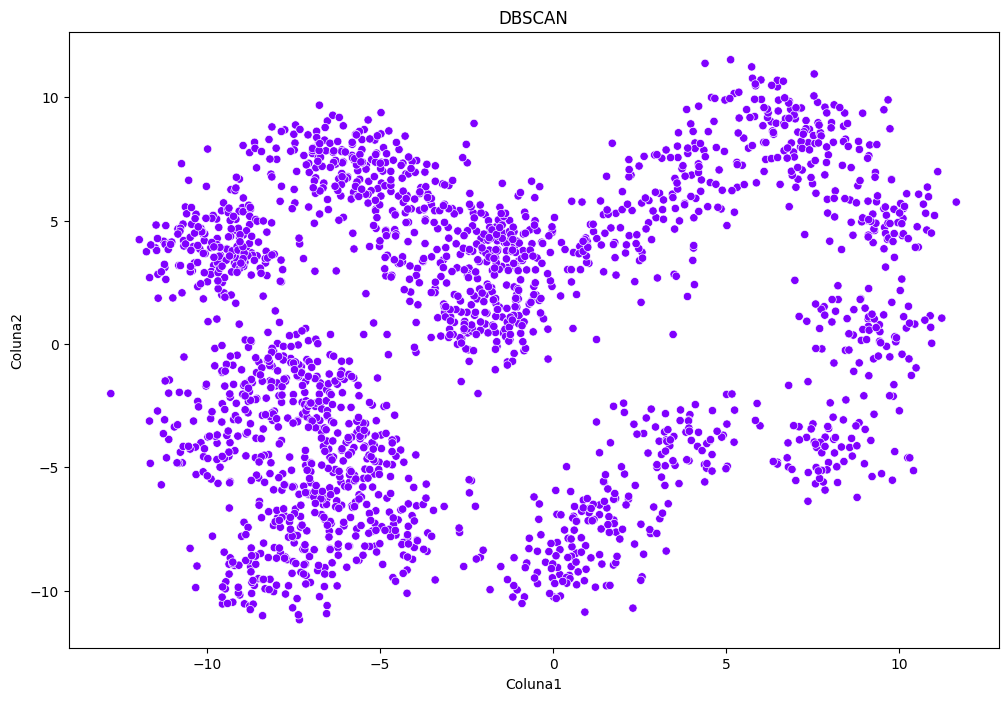

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df, x='Coluna1', y='Coluna2', c=labels4, cmap='rainbow')
# plt.scatter(centers4[:, 0], centers4[:, 1], s=250, c='black', marker='X')
plt.title('DBSCAN')
plt.show()

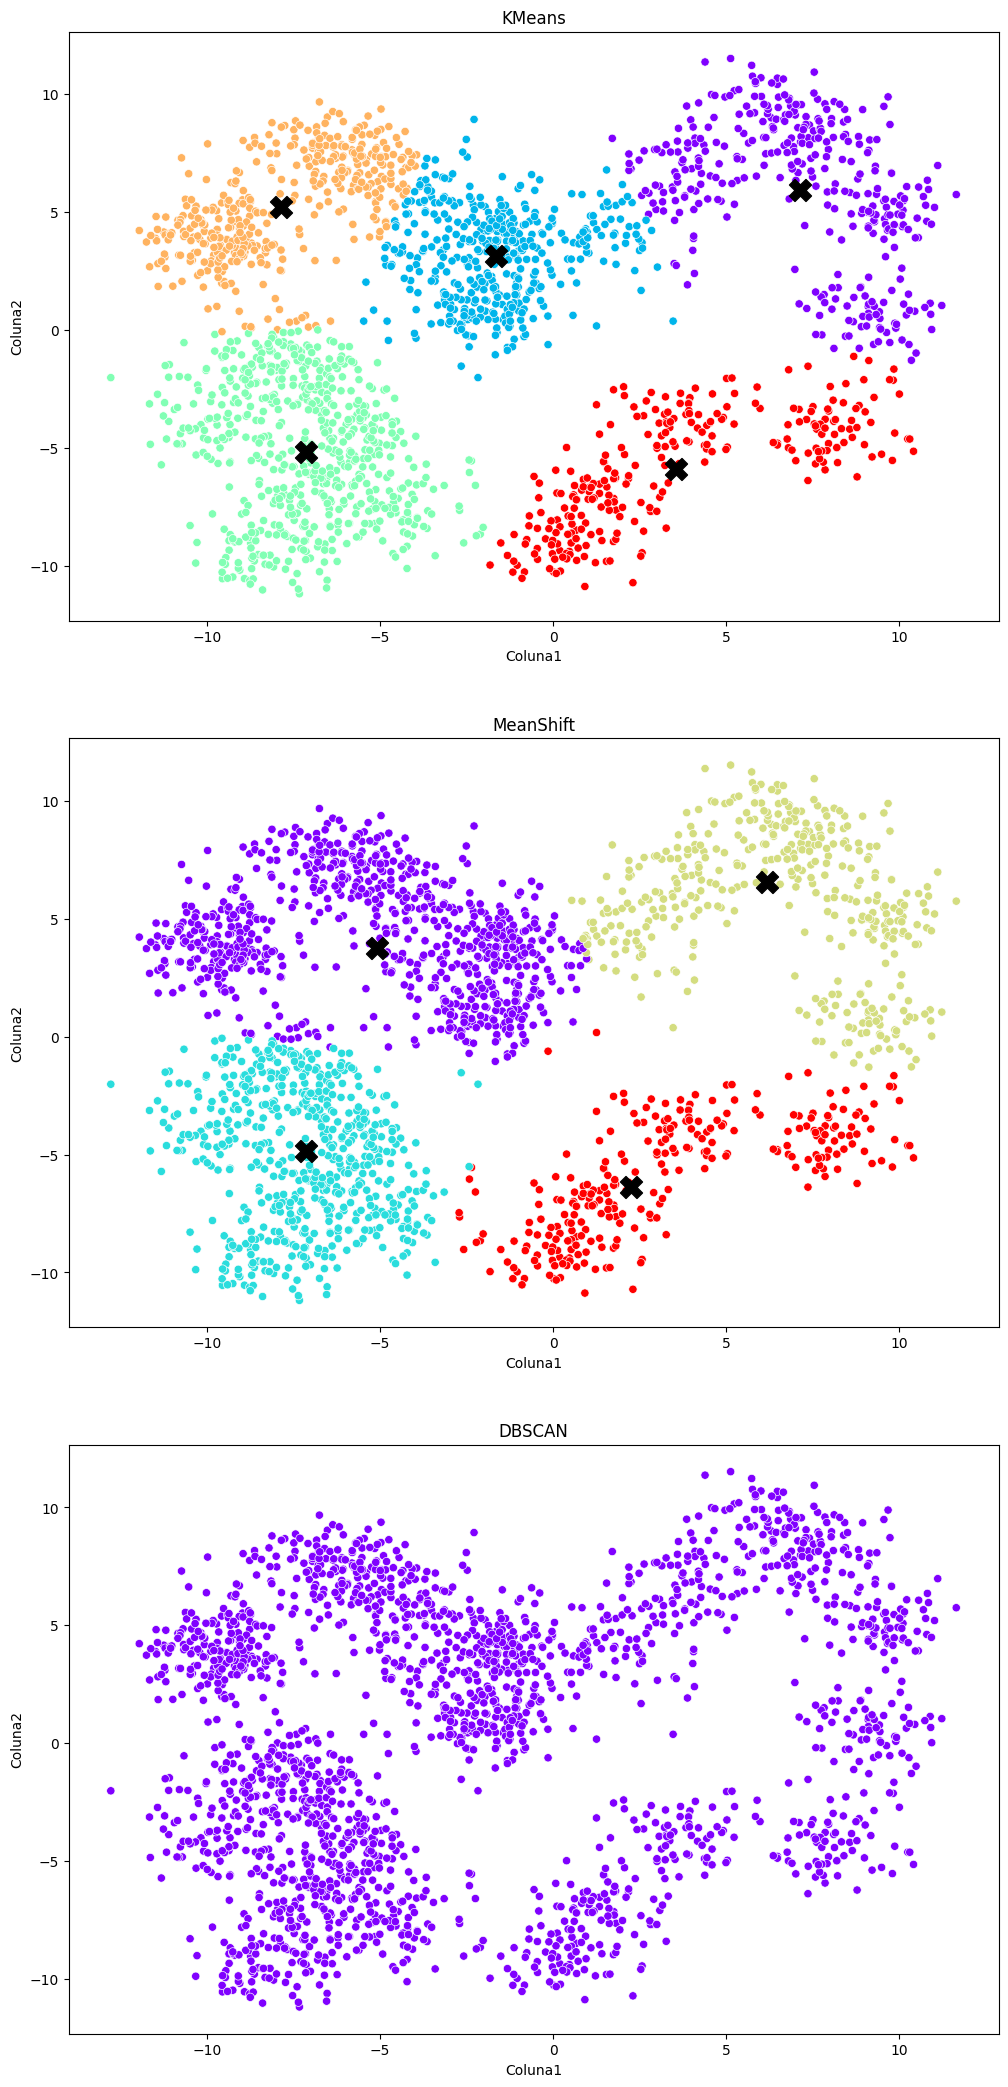

In [ ]:
fig, (up, middle, down) = plt.subplots(3, 1, figsize=(12, 26))

sns.scatterplot(df, x='Coluna1', y='Coluna2', c=labels1, cmap='rainbow', ax=up)
up.scatter(centers1[:, 0], centers1[:, 1], s=250, c='black', marker='X')
up.set_title('KMeans')
up.set_xlabel('Coluna1')
up.set_ylabel('Coluna2')

sns.scatterplot(df, x='Coluna1', y='Coluna2', c=labels2, cmap='rainbow', ax=middle)
middle.scatter(centers2[:, 0], centers2[:, 1], s=250, c='black', marker='X')
middle.set_title('MeanShift')
middle.set_xlabel('Coluna1')
middle.set_ylabel('Coluna2')

sns.scatterplot(df, x='Coluna1', y='Coluna2', c=labels4, cmap='rainbow', ax=down)
# down.scatter(centers4[:, 0], centers4[:, 1], s=250, c='black', marker='X', ax=down)
down.set_title('DBSCAN')
down.set_xlabel('Coluna1')
down.set_ylabel('Coluna2')

plt.show()